<a href="https://colab.research.google.com/github/vathsal14/NOVO-NEUROTECH/blob/main/newparkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install requests
# Installs the 'requests' library, which is used for making HTTP requests in Python. It simplifies interacting with web services and APIs.
# version: requests-2.32.3
!pip install mne
# Installs the 'mne' library, which is a powerful tool for processing, analyzing, and visualizing EEG, MEG, and other neurophysiological data.
# version: mne-1.9.0
!pip install pyedflib
# Installs the 'pyedflib' library, which allows reading and writing of EDF (European Data Format) and BDF (Biosemi Data Format) files, commonly used in EEG data storage.
# version: pyedflib-0.1.38
!pip install openneuro-py
# Installs the 'openneuro-py' library, a Python client for accessing and downloading datasets from OpenNeuro, a platform for neuroimaging data sharing.
# aiofiles-24.1.0 graphql-core-3.2.5 openneuro-py-2024.2.0 sgqlc-16.4
!pip install PyWavelets
# Installs the 'PyWavelets' library, which provides wavelet transform functions for signal processing, including denoising, feature extraction, and compression.
# version: PyWavelets-1.8.0

In [3]:
# Importing the Google Colab drive module
from google.colab import drive
# Mounting Google Drive to the Colab environment
# This allows you to access files stored in your Google Drive directly from the Colab notebook.
# The "/content/drive" is the directory where the Drive will be mounted.
# After mounting, you can interact with your Drive files as if they were local files.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install python-dotenv
# 'python-dotenv' is a library that allows you to manage environment variables from a `.env` file.
# This is particularly useful for securely storing sensitive information such as API keys, database credentials, etc.
# By using environment variables, you avoid hardcoding sensitive data directly in your code.

In [5]:
import os  # The 'os' module is used to interact with the operating system, such as reading environment variables.
from dotenv import load_dotenv  # 'load_dotenv' is used to load environment variables from a .env file.
# Specify the path to the .env file
# The .env file stores environment variables like API keys securely.
# In this case, the .env file is located in the user's Google Drive.
env_path = '/content/drive/My Drive/ColabEnvFiles/API_KEY.env'
# Load the environment variables from the specified .env file
load_dotenv(env_path)
# Access the API key using the key name as defined in the .env file
api_key = os.getenv("OPENNEURO_API_KEY")
# Check if the API key was successfully loaded
if api_key:
    print("API Key loaded successfully!")  # Inform the user that the API key was loaded.
else:
    print("Failed to load API Key. Check your .env file and path.")  # Error message if loading fails.

API Key loaded successfully!


In [6]:
import os
import openneuro

# Prompt the user to enter the dataset ID
dataset_id = input("Enter the dataset ID (e.g., ds002778): ")

# Validate the input
if not dataset_id:
    raise ValueError("Dataset ID must be provided.")

print(f"Processing dataset: {dataset_id}")

# Function to create a directory
def create_directory(dir_path):
    try:
        # Attempt to create the directory
        os.makedirs(dir_path, exist_ok=True)
        print(f"Directory created successfully at: {dir_path}")
    except PermissionError:
        # Handle permission errors
        print(f"Permission denied: Unable to create directory at {dir_path}. Please check permissions.")
    except OSError as e:
        # Handle other OS-related errors
        print(f"Error creating directory at {dir_path}: {e}")
    except Exception as e:
        # Catch any unexpected errors
        print(f"An unexpected error occurred: {e}")

# Determine the target directory for the download
target_dir = os.path.join(os.getcwd(), dataset_id)

# Create the target directory
create_directory(target_dir)

# Download the entire dataset
openneuro.download(dataset=dataset_id, target_dir=target_dir)

print(f"Dataset {dataset_id} downloaded successfully to {target_dir}.")


Enter the dataset ID (e.g., ds002778): ds002778
Processing dataset: ds002778
Directory created successfully at: /content/ds002778

👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds002778 …


📁 Traversing directories for ds002778 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 328 files (5 concurrent downloads). 
✅ Finished downloading ds002778.
 
🧠 Please enjoy your brains.
 
Dataset ds002778 downloaded successfully to /content/ds002778.


In [7]:
import os
import json

target_dir = '/content/ds002778'

subject_data = {}

for subject_folder in os.listdir(target_dir):

    if subject_folder.startswith('sub-'):
        subject_id = subject_folder.split('-')[1]
        print(f"\nProcessing subject: {subject_id}")

        if subject_id.startswith('pd'):
            session_path = os.path.join(target_dir, subject_folder, 'ses-off', 'eeg')
            session_type = 'ses-off'
            json_path = os.path.join(target_dir, subject_folder, 'ses-off', 'beh')
        elif subject_id.startswith('hc'):
            session_path = os.path.join(target_dir, subject_folder, 'ses-hc', 'eeg')
            session_type = 'ses-hc'
            json_path = None
        else:
            print(f"Unknown subject type for {subject_id}. Skipping.")
            continue

        if not os.path.exists(session_path):
            print(f"No '{session_type}/eeg' folder found for subject {subject_id}. Skipping.")
            continue

        bdf_file = None
        for file in os.listdir(session_path):
            if file.endswith('.bdf') and f"sub-{subject_id}" in file:
                bdf_file = os.path.join(session_path, file)
                break

        json_file = None
        if subject_id.startswith('pd') and json_path:
            for file in os.listdir(json_path):
                if file.endswith('.json'):
                    json_file = os.path.join(json_path, file)
                    break

        subject_data[subject_id] = {
            "bdf_file": bdf_file,
            "json_file": json_file if subject_id.startswith('pd') else None
        }

        if bdf_file:
            print(f"✅ Found EEG file: {bdf_file}")
        else:
            print(f"❌ No EEG file found for {subject_id}.")

        if json_file:
            print(f"✅ Found JSON file: {json_file}")
        elif subject_id.startswith('pd'):
            print(f"❌ No JSON file found for {subject_id}.")

# Print final summary
print("\n📝 Summary of Collected Data:")
for subject, files in subject_data.items():
    print(f"Subject {subject}: EEG - {files['bdf_file']}, JSON - {files['json_file']}")


Processing subject: pd3
✅ Found EEG file: /content/ds002778/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf
✅ Found JSON file: /content/ds002778/sub-pd3/ses-off/beh/sub-pd3_ses-off_task-rest_beh.json

Processing subject: hc30
✅ Found EEG file: /content/ds002778/sub-hc30/ses-hc/eeg/sub-hc30_ses-hc_task-rest_eeg.bdf

Processing subject: pd13
✅ Found EEG file: /content/ds002778/sub-pd13/ses-off/eeg/sub-pd13_ses-off_task-rest_eeg.bdf
✅ Found JSON file: /content/ds002778/sub-pd13/ses-off/beh/sub-pd13_ses-off_task-rest_beh.json

Processing subject: pd12
✅ Found EEG file: /content/ds002778/sub-pd12/ses-off/eeg/sub-pd12_ses-off_task-rest_eeg.bdf
✅ Found JSON file: /content/ds002778/sub-pd12/ses-off/beh/sub-pd12_ses-off_task-rest_beh.json

Processing subject: pd23
✅ Found EEG file: /content/ds002778/sub-pd23/ses-off/eeg/sub-pd23_ses-off_task-rest_eeg.bdf
✅ Found JSON file: /content/ds002778/sub-pd23/ses-off/beh/sub-pd23_ses-off_task-rest_beh.json

Processing subject: hc7
✅ Found EEG file

In [ ]:
# import os

# raw_fname = target_dir

# for subject_folder in os.listdir(raw_fname):
#     if subject_folder.startswith('sub-'):
#         subject_id = subject_folder.split('-')[1]
#         print(f"Processing subject: {subject_id}")

#         if subject_id.startswith('pd'):
#             session_path = os.path.join(raw_fname, subject_folder, 'ses-off', 'eeg')
#             session_type = 'ses-off'
#         elif subject_id.startswith('hc'):
#             session_path = os.path.join(raw_fname, subject_folder, 'ses-hc', 'eeg')
#             session_type = 'ses-hc'
#         else:
#             print(f"Unknown subject type for {subject_id}. Skipping.")
#             continue

#         if not os.path.exists(session_path):
#             print(f"No '{session_type}/eeg' folder found for subject {subject_id}. Skipping.")
#             continue

#         bdf_file = None
#         for file in os.listdir(session_path):
#             if file.endswith('.bdf') and f"sub-{subject_id}" in file:
#                 bdf_file = os.path.join(session_path, file)
#                 break

#         if bdf_file:
#             print(f"Found EEG file for subject {subject_id} ({session_type}): {bdf_file}")
#             try:
#                 with open(bdf_file, 'rb') as f:
#                     header = f.read(256)
#                     print(f"Header for subject {subject_id}:\n{header}")
#             except Exception as e:
#                 print(f"Error reading file {bdf_file}: {e}")
#         else:
#             print(f"EEG .bdf file not found for subject {subject_id} in {session_type} session.")


In [8]:
# correct running making changes to upper one(final)
import os
import openneuro
import mne
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

subject_dirs = [d for d in os.listdir(target_dir) if d.startswith('sub-')]

print(f"Found {len(subject_dirs)} subjects in the dataset.")

features_list = []
epoch_length_sec = 5

for subject in subject_dirs:
    print(f"Processing subject: {subject}")

    if 'sub-pd' in subject:
        raw_fname = os.path.join(target_dir, subject, 'ses-off', 'eeg', f'{subject}_ses-off_task-rest_eeg.bdf')
    else:
        raw_fname = os.path.join(target_dir, subject, 'ses-hc', 'eeg', f'{subject}_ses-hc_task-rest_eeg.bdf')

    if not os.path.exists(raw_fname):
        print(f"EEG data file not found for {subject}. Skipping.")
        continue

    try:
        raw = mne.io.read_raw_bdf(raw_fname, preload=True)
        raw_filtered = raw.filter(l_freq=0.5, h_freq=50, fir_design='firwin', verbose=True)
        montage = mne.channels.make_standard_montage("standard_1020")
        raw_filtered.set_montage(montage, on_missing="ignore")

        ica = mne.preprocessing.ICA(n_components=20, random_state=42, max_iter=1000)
        ica.fit(raw_filtered)
        raw_cleaned = ica.apply(raw_filtered)

        sfreq = raw.info['sfreq']
        n_samples_per_epoch = int(epoch_length_sec * sfreq)
        n_epochs = int(raw_filtered.n_times // n_samples_per_epoch)

        events = np.array([[i * n_samples_per_epoch, 0, i] for i in range(n_epochs)])

        event_id = {f"epoch_{i}": i for i in range(n_epochs)}

        epochs = mne.Epochs(raw_filtered, events, event_id=event_id, tmin=0, tmax=epoch_length_sec, baseline=None, detrend=1, preload=True)

        freq_bands = {
            'delta': (1, 4),
            'theta': (4, 8),
            'alpha': (8, 12),
            'beta': (12, 30),
            'gamma': (30, 50)
        }

        def compute_band_power(epoch_data, sfreq, freq_bands):
            power_features = {}
            for band, (low, high) in freq_bands.items():
                f, psd = welch(epoch_data, sfreq, nperseg=1024)
                psd = psd[(f >= low) & (f <= high)]
                power = np.sum(psd)
                power_features[f'{band}_power'] = power
            return power_features

        for epoch_idx, epoch_data in enumerate(epochs.get_data()):
            band_power = compute_band_power(epoch_data.mean(axis=0), raw.info['sfreq'], freq_bands)
            band_power['subject'] = subject
            band_power['epoch'] = epoch_idx
            features_list.append(band_power)

        print(f"EEG data for {subject} loaded successfully.")
    except Exception as e:
        print(f"Error loading data for subject {subject}: {e}")

print(f"Total epochs processed: {len(features_list)}")

if features_list:
    features_df = pd.DataFrame(features_list)
    features_df.to_csv("eeg_features.csv", index=False)
    print("Feature extraction complete. Features saved to 'eeg_features.csv'.")
else:
    print("No features extracted. The CSV will not be created.")

Found 31 subjects in the dataset.
Processing subject: sub-pd3
Extracting EDF parameters from /content/ds002778/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   199.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 17.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
1 bad epochs dropped
EEG data for sub-pd3 loaded successfully.
Processing subject: sub-hc30
Extracting EDF parameters from /content/ds002778/sub-hc30/ses-hc/eeg/sub-hc30_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc30 loaded successfully.
Processing subject: sub-pd13
Extracting EDF parameters from /content/ds002778/sub-pd13/ses-off/eeg/sub-pd13_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 12.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd13 loaded successfully.
Processing subject: sub-pd12
Extracting EDF parameters from /content/ds002778/sub-pd12/ses-off/eeg/sub-pd12_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105983  =      0.000 ...   206.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 11.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 41 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd12 loaded successfully.
Processing subject: sub-pd23
Extracting EDF parameters from /content/ds002778/sub-pd23/ses-off/eeg/sub-pd23_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 104447  =      0.000 ...   203.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd23 loaded successfully.
Processing subject: sub-hc7
Extracting EDF parameters from /content/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 8.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc7 loaded successfully.
Processing subject: sub-pd19
Extracting EDF parameters from /content/ds002778/sub-pd19/ses-off/eeg/sub-pd19_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 94719  =      0.000 ...   184.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
1 bad epochs dropped
EEG data for sub-pd19 loaded successfully.
Processing subject: sub-hc2
Extracting EDF parameters from /content/ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99327  =      0.000 ...   193.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 6.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc2 loaded successfully.
Processing subject: sub-pd26
Extracting EDF parameters from /content/ds002778/sub-pd26/ses-off/eeg/sub-pd26_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 8.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd26 loaded successfully.
Processing subject: sub-hc20
Extracting EDF parameters from /content/ds002778/sub-hc20/ses-hc/eeg/sub-hc20_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 94207  =      0.000 ...   183.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc20 loaded successfully.
Processing subject: sub-pd5
Extracting EDF parameters from /content/ds002778/sub-pd5/ses-off/eeg/sub-pd5_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 100863  =      0.000 ...   196.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd5 loaded successfully.
Processing subject: sub-hc4
Extracting EDF parameters from /content/ds002778/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 92671  =      0.000 ...   180.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 167.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 2561 original time points ...


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0 bad epochs dropped
EEG data for sub-hc4 loaded successfully.
Processing subject: sub-pd28
Extracting EDF parameters from /content/ds002778/sub-pd28/ses-off/eeg/sub-pd28_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105471  =      0.000 ...   205.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)

Fitting ICA to data using 40 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 41 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd28 loaded successfully.
Processing subject: sub-pd16
Extracting EDF parameters from /content/ds002778/sub-pd16/ses-off/eeg/sub-pd16_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96255  =      0.000 ...   187.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 6.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd16 loaded successfully.
Processing subject: sub-hc8
Extracting EDF parameters from /content/ds002778/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 6.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc8 loaded successfully.
Processing subject: sub-hc21
Extracting EDF parameters from /content/ds002778/sub-hc21/ses-hc/eeg/sub-hc21_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 5.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc21 loaded successfully.
Processing subject: sub-hc29
Extracting EDF parameters from /content/ds002778/sub-hc29/ses-hc/eeg/sub-hc29_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 101887  =      0.000 ...   198.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc29 loaded successfully.
Processing subject: sub-hc10
Extracting EDF parameters from /content/ds002778/sub-hc10/ses-hc/eeg/sub-hc10_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102911  =      0.000 ...   200.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc10 loaded successfully.
Processing subject: sub-pd17
Extracting EDF parameters from /content/ds002778/sub-pd17/ses-off/eeg/sub-pd17_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 7.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd17 loaded successfully.
Processing subject: sub-hc24
Extracting EDF parameters from /content/ds002778/sub-hc24/ses-hc/eeg/sub-hc24_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc24 loaded successfully.
Processing subject: sub-pd22
Extracting EDF parameters from /content/ds002778/sub-pd22/ses-off/eeg/sub-pd22_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96255  =      0.000 ...   187.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 4.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd22 loaded successfully.
Processing subject: sub-hc31
Extracting EDF parameters from /content/ds002778/sub-hc31/ses-hc/eeg/sub-hc31_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95743  =      0.000 ...   186.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc31 loaded successfully.
Processing subject: sub-hc25
Extracting EDF parameters from /content/ds002778/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 103423  =      0.000 ...   201.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Selecting by number: 20 components
Fitting ICA took 4.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc25 loaded successfully.
Processing subject: sub-hc1
Extracting EDF parameters from /content/ds002778/sub-hc1/ses-hc/eeg/sub-hc1_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc1 loaded successfully.
Processing subject: sub-hc32
Extracting EDF parameters from /content/ds002778/sub-hc32/ses-hc/eeg/sub-hc32_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 100351  =      0.000 ...   195.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 39 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc32 loaded successfully.
Processing subject: sub-hc18
Extracting EDF parameters from /content/ds002778/sub-hc18/ses-hc/eeg/sub-hc18_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 12.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-hc18 loaded successfully.
Processing subject: sub-hc33
Extracting EDF parameters from /content/ds002778/sub-hc33/ses-hc/eeg/sub-hc33_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97279  =      0.000 ...   189.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.01

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
1 bad epochs dropped
EEG data for sub-hc33 loaded successfully.
Processing subject: sub-pd11
Extracting EDF parameters from /content/ds002778/sub-pd11/ses-off/eeg/sub-pd11_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 170.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
37 matching events found


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd11 loaded successfully.
Processing subject: sub-pd6
Extracting EDF parameters from /content/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 13.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd6 loaded successfully.
Processing subject: sub-pd9
Extracting EDF parameters from /content/ds002778/sub-pd9/ses-off/eeg/sub-pd9_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 11.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd9 loaded successfully.
Processing subject: sub-pd14
Extracting EDF parameters from /content/ds002778/sub-pd14/ses-off/eeg/sub-pd14_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 149503  =      0.000 ...   291.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 20 components
Fitting ICA took 10.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 40 PCA components
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 58 events and 2561 original time points ...
0 bad epochs dropped
EEG data for sub-pd14 loaded successfully.
Total epochs processed: 1198
Feature extraction complete. Features saved to 'eeg_features.csv'.


In [9]:
import os
import json
import pandas as pd

target_dir = '/content/ds002778'
metadata_list = []
subject_dirs = [d for d in os.listdir(target_dir) if d.startswith('sub-pd')]

print(f"Found {len(subject_dirs)} Parkinson's subjects with possible JSON metadata.")
for subject in subject_dirs:
    print(f"Processing JSON for {subject}...")

    json_path = os.path.join(target_dir, subject, 'ses-off', 'beh')

    if not os.path.exists(json_path):
        print(f"No JSON folder found for {subject}. Skipping.")
        continue
    json_file = None
    for file in os.listdir(json_path):
        if file.endswith('.json'):
            json_file = os.path.join(json_path, file)
            break

    if not json_file:
        print(f"No JSON file found for {subject}. Skipping.")
        continue

    try:
        with open(json_file, 'r') as f:
            data = json.load(f)
        metadata_entry = {
            "subject": subject,
            "Lev_Dose_mg": data["meds"]["Lev"]["Dose (mg)"] if "Lev" in data["meds"] else None,
            "Lev_hours_since_meds": data["meds"]["Lev"]["hours since meds"] if "Lev" in data["meds"] else None,
            "Lev_times_per_day": data["meds"]["Lev"]["times/day"] if "Lev" in data["meds"] else None,
            "Ras_Dose_mg": data["meds"]["Ras"]["Dose (mg)"] if "Ras" in data["meds"] else None,
            "Ras_hours_since_meds": data["meds"]["Ras"]["hours since meds"] if "Ras" in data["meds"] else None,
            "Ras_times_per_day": data["meds"]["Ras"]["times/day"] if "Ras" in data["meds"] else None,
            "Beck_Score": data["questionairres"]["Beck"] if "Beck" in data["questionairres"] else None,
            "Bradykinesia_UPDRS": data["questionairres"]["Brady kinesia UPDRS"] if "Brady kinesia UPDRS" in data["questionairres"] else None,
            "H_Y_Stage": data["questionairres"]["H&Y"] if "H&Y" in data["questionairres"] else None,
            "Left_UPDRS": data["questionairres"]["Left UPDRS"] if "Left UPDRS" in data["questionairres"] else None,
            "Rest_Tremor_UPDRS": data["questionairres"]["Rest Tremor UPDRS"] if "Rest Tremor UPDRS" in data["questionairres"] else None,
            "Right_UPDRS": data["questionairres"]["Right UPDRS"] if "Right UPDRS" in data["questionairres"] else None,
            "Rigidity_UPDRS": data["questionairres"]["Rigidity UPDRS"] if "Rigidity UPDRS" in data["questionairres"] else None,
            "Total_UPDRS": data["questionairres"]["Total UPDRS"] if "Total UPDRS" in data["questionairres"] else None,
            "UPDRS_18_26": data["questionairres"]["UPDRS 18-26"] if "UPDRS 18-26" in data["questionairres"] else None
        }

        metadata_list.append(metadata_entry)
        print(f" JSON processed for {subject}.")

    except Exception as e:
        print(f" Error processing JSON for {subject}: {e}")
if metadata_list:
    metadata_df = pd.DataFrame(metadata_list)
    metadata_df.to_csv("json_metadata.csv", index=False)
    print(" JSON metadata saved to 'json_metadata.csv'.")
else:
    print(" No JSON data extracted.")

Found 15 Parkinson's subjects with possible JSON metadata.
Processing JSON for sub-pd3...
 JSON processed for sub-pd3.
Processing JSON for sub-pd13...
 JSON processed for sub-pd13.
Processing JSON for sub-pd12...
 JSON processed for sub-pd12.
Processing JSON for sub-pd23...
 JSON processed for sub-pd23.
Processing JSON for sub-pd19...
 JSON processed for sub-pd19.
Processing JSON for sub-pd26...
 JSON processed for sub-pd26.
Processing JSON for sub-pd5...
 JSON processed for sub-pd5.
Processing JSON for sub-pd28...
 JSON processed for sub-pd28.
Processing JSON for sub-pd16...
 JSON processed for sub-pd16.
Processing JSON for sub-pd17...
 JSON processed for sub-pd17.
Processing JSON for sub-pd22...
 JSON processed for sub-pd22.
Processing JSON for sub-pd11...
 JSON processed for sub-pd11.
Processing JSON for sub-pd6...
 JSON processed for sub-pd6.
Processing JSON for sub-pd9...
 JSON processed for sub-pd9.
Processing JSON for sub-pd14...
 JSON processed for sub-pd14.
 JSON metadata save

In [10]:
import pandas as pd

# Load EEG features
eeg_features_df = pd.read_csv("eeg_features.csv")
print(f"EEG features loaded: {eeg_features_df.shape}")

# Load JSON metadata (only PD subjects have this)
json_metadata_df = pd.read_csv("json_metadata.csv")
print(f"JSON metadata loaded: {json_metadata_df.shape}")

# Merge with left join to retain all EEG subjects
merged_df = pd.merge(eeg_features_df, json_metadata_df, on="subject", how="left")

# Identify HC subjects (those with missing H&Y values)
merged_df["is_hc"] = merged_df["H_Y_Stage"].isna()

# Define risk percentage function
def calculate_risk_percentage(hy_stage, is_hc):
    if is_hc:
        return 0  # HC subjects have 0% risk
    elif hy_stage <= 1.0:
        return 20
    elif hy_stage >= 3.0:
        return 100
    else:
        return 20 + (hy_stage - 1.0) * ((100 - 20) / (3.0 - 1.0))

# Apply risk calculation
merged_df["risk_percentage"] = merged_df.apply(lambda row: calculate_risk_percentage(row["H_Y_Stage"], row["is_hc"]), axis=1)

# Save the updated dataset
merged_df.to_csv("merged_dataset_with_risk.csv", index=False)
print(f" Merged dataset saved as 'merged_dataset_with_risk.csv' with shape: {merged_df.shape}")


EEG features loaded: (1198, 7)
JSON metadata loaded: (15, 16)
 Merged dataset saved as 'merged_dataset_with_risk.csv' with shape: (1198, 24)


In [11]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("merged_dataset_with_risk.csv")
eeg_features = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']
if 'risk_percentage' not in df.columns:
    raise ValueError("The dataset must contain a 'risk_percentage' column!")
X = df[eeg_features]
y = df['risk_percentage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv("train_set.csv", index=False)
test_df.to_csv("test_set.csv", index=False)
print("Train and test datasets created successfully!")

Train and test datasets created successfully!


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import joblib

# train_df = pd.read_csv("train_set.csv")
# test_df = pd.read_csv("test_set.csv")
# eeg_features = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']
# X_train, y_train = train_df[eeg_features], train_df['risk_percentage']
# X_test, y_test = test_df[eeg_features], test_df['risk_percentage']

# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Model Performance:\n MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

# joblib.dump(rf_model, "eeg_risk_prediction_model.pkl")
# print("Model saved as 'eeg_risk_prediction_model.pkl'")

Model Performance:
 MAE: 40.74, MSE: 1875.50, R²: -0.02
Model saved as 'eeg_risk_prediction_model.pkl'


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For saving the model

# Load training and testing datasets
train_df = pd.read_csv("train_set.csv")
test_df = pd.read_csv("test_set.csv")

# Define EEG features
eeg_features = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

# Extract features (X) and target (y)
X_train, y_train = train_df[eeg_features], train_df['risk_percentage']
X_test, y_test = test_df[eeg_features], test_df['risk_percentage']

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict risk percentages on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\n MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

# Save the model for future predictions
joblib.dump(rf_model, "eeg_risk_prediction_model.pkl")

print("Model saved as 'eeg_risk_prediction_model.pkl'")

Model Performance:
 MAE: 39.37, MSE: 1758.14, R²: -0.07
Model saved as 'eeg_risk_prediction_model.pkl'


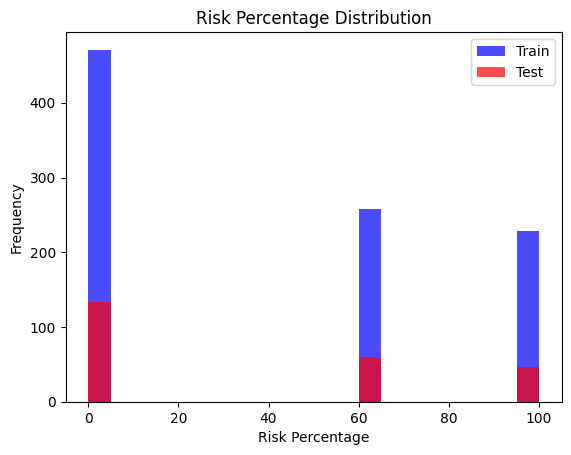

In [14]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=20, alpha=0.7, color='blue', label='Train')
plt.hist(y_test, bins=20, alpha=0.7, color='red', label='Test')
plt.xlabel("Risk Percentage")
plt.ylabel("Frequency")
plt.legend()
plt.title("Risk Percentage Distribution")
plt.show()

In [16]:
!pip install --upgrade imblearn
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [18]:
!pip install --upgrade --force-reinstall scikit-learn imbalanced-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 18.9 MB/s eta 0:00:00
Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new distribution
import matplotlib.pyplot as plt
plt.hist(y_train_resampled, bins=20, alpha=0.7, color='blue', label='SMOTE Train')
plt.hist(y_test, bins=20, alpha=0.7, color='red', label='Test')
plt.xlabel("Risk Percentage")
plt.ylabel("Frequency")
plt.legend()
plt.title("Risk Percentage Distribution After SMOTE")
plt.show()


ImportError: cannot import name 'UnsetMetadataPassedError' from 'sklearn.exceptions' (/usr/local/lib/python3.11/dist-packages/sklearn/exceptions.py)

In [ ]:
!pip install --upgrade scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 18.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

ImportError: cannot import name '_fit_context' from 'sklearn.base' (/usr/local/lib/python3.11/dist-packages/sklearn/base.py)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import xgboost as xgb
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
import joblib

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 1, 5, 10]
}

xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

scorer = make_scorer(r2_score)

random_search = RandomizedSearchCV(
    xgb_reg,
    param_grid,
    n_iter=20,
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_xgb = random_search.best_estimator_
y_pred_tuned = best_xgb.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nTuned Model Performance:")
print(f"MAE: {mae_tuned:.2f}, MSE: {mse_tuned:.2f}, R²: {r2_tuned:.2f}")

joblib.dump(best_xgb, "eeg_risk_prediction_xgboost_tuned.pkl")
print("Tuned model saved as 'eeg_risk_prediction_xgboost_tuned.pkl'")

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
# import lightgbm as lgb
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Define LightGBM model
# lgb_reg = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)

# # Train model
# lgb_reg.fit(X_train, y_train)

# # Predict
# y_pred = lgb_reg.predict(X_test)

# # Evaluate performance
# print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
# print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
# print(f"R²: {r2_score(y_test, y_pred):.2f}")


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1157
[LightGBM] [Info] Number of data points in the train set: 958, number of used features: 5
[LightGBM] [Info] Start training from score 39.290188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
!pip install PyWavelets


In [ ]:
pip install mne-connectivity


In [ ]:
import mne
from mne_connectivity import spectral_connectivity

ImportError: cannot import name 'spectral_connectivity' from 'mne_connectivity' (/usr/local/lib/python3.11/dist-packages/mne_connectivity/__init__.py)

In [ ]:
import mne
print(mne.__version__)


1.9.0


In [ ]:
import pywt
import mne
from mne.connectivity import spectral_connectivity

ModuleNotFoundError: No module named 'mne.connectivity'

In [ ]:
pip install mne numpy scipy pandas pywt xgboost lightgbm scikit-learn tensorflow

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [ ]:
import os
import numpy as np
import pandas as pd
import mne
from scipy.signal import welch
from scipy.stats import entropy
import pywt
from mne.connectivity import spectral_connectivity

def load_eeg_data(file_path):
    raw = mne.io.read_raw_bdf(file_path, preload=True)
    raw.filter(l_freq=0.5, h_freq=50)
    return raw

def compute_band_power(epoch_data, sfreq):
    bands = {'delta': (1, 4), 'theta': (4, 8), 'alpha': (8, 12), 'beta': (12, 30), 'gamma': (30, 50)}
    psd_features = {}

    for band, (low, high) in bands.items():
        f, psd = welch(epoch_data, sfreq, nperseg=1024)
        psd = psd[(f >= low) & (f <= high)]
        psd_features[f'{band}_power'] = np.sum(psd)

    return psd_features

def spectral_entropy(epoch_data):
    psd = np.abs(np.fft.fft(epoch_data))**2
    return entropy(psd)

def hjorth_params(epoch_data):
    diff1 = np.diff(epoch_data)
    diff2 = np.diff(diff1)
    mobility = np.sqrt(np.var(diff1) / np.var(epoch_data))
    complexity = np.sqrt(np.var(diff2) / np.var(diff1)) / mobility
    return mobility, complexity

def wavelet_features(epoch_data):
    coeffs = pywt.wavedec(epoch_data, 'db4', level=4)
    return np.std(coeffs[0]), entropy(np.abs(coeffs[0]))

def compute_coherence(raw):
    con, _, _, _, _ = spectral_connectivity(raw.get_data(), method='coh', sfreq=raw.info['sfreq'], fmin=8, fmax=12)
    return np.mean(con)

features_list = []
eeg_dir = "your_eeg_data_folder"

for file in os.listdir(eeg_dir):
    if file.endswith('.bdf'):
        raw = load_eeg_data(os.path.join(eeg_dir, file))
        sfreq = raw.info['sfreq']

        for epoch_data in raw.get_data():
            features = compute_band_power(epoch_data, sfreq)
            features['spectral_entropy'] = spectral_entropy(epoch_data)
            features['hjorth_mobility'], features['hjorth_complexity'] = hjorth_params(epoch_data)
            features['wavelet_std'], features['wavelet_entropy'] = wavelet_features(epoch_data)
            features['coherence'] = compute_coherence(raw)
            features['subject'] = file.split('_')[0]
            features_list.append(features)

df = pd.DataFrame(features_list)
df.to_csv("eeg_features_advanced.csv", index=False)
print("Feature extraction complete!")

ModuleNotFoundError: No module named 'mne.connectivity'

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# from sklearn.preprocessing import StandardScaler
# from sklearn.utils import shuffle
# from keras_tuner.tuners import RandomSearch
# import random

# # Set random seeds for reproducibility
# np.random.seed(42)
# random.seed(42)
# tf.random.set_seed(42)

# # Load EEG datasets
# train_df = pd.read_csv("train_set.csv")
# test_df = pd.read_csv("test_set.csv")

# # Feature selection - Only EEG features
# eeg_features = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']

# # Extract features and labels
# X_train = train_df[eeg_features].values
# X_test = test_df[eeg_features].values
# y_train = train_df['risk_percentage'].values  # Change label to risk percentage
# y_test = test_df['risk_percentage'].values

# # Normalize data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Reshape for CNN input (1D Conv)
# X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
# X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# # Define CNN model using Keras Tuner
# def build_cnn_model(hp):
#     model = Sequential()

#     model.add(Conv1D(
#         filters=hp.Int('filters', min_value=32, max_value=128, step=32),
#         kernel_size=hp.Int('kernel_size', min_value=3, max_value=7, step=2),
#         activation='relu',
#         padding='same',
#         input_shape=(X_train_scaled.shape[1], 1)
#     ))
#     model.add(MaxPooling1D(pool_size=2))

#     model.add(Flatten())

#     for i in range(hp.Int('num_dense_layers', 1, 3)):
#         model.add(Dense(
#             units=hp.Int(f'units_dense_{i}', min_value=32, max_value=128, step=32),
#             activation='relu'
#         ))
#         model.add(Dropout(hp.Float(f'dropout_dense_{i}', min_value=0.1, max_value=0.5, step=0.1)))

#     # Output layer for risk percentage (0-100)
#     model.add(Dense(1, activation='sigmoid'))  # Sigmoid to scale output between 0 and 1

#     optimizer = Adam(
#         learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
#     )
#     model.compile(
#         optimizer=optimizer,
#         loss='mse',  # Mean Squared Error for continuous values
#         metrics=['mae']
#     )

#     return model

# # Hyperparameter tuning using RandomSearch
# tuner = RandomSearch(
#     build_cnn_model,
#     objective='val_mae',
#     max_trials=10,
#     executions_per_trial=1,
#     directory='hyperparam_tuning',
#     project_name='eeg_risk_prediction_cnn'
# )

# # Perform tuning
# tuner.search(
#     X_train_scaled, y_train,
#     epochs=50,
#     validation_split=0.2,
#     batch_size=32,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
# )

# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Build the best model
# best_model = tuner.hypermodel.build(best_hps)

# # Train the best model
# history = best_model.fit(
#     X_train_scaled, y_train,
#     epochs=100,
#     batch_size=32,
#     validation_split=0.2,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
#     verbose=1
# )

# # Evaluate on test data
# test_loss, test_mae = best_model.evaluate(X_test_scaled, y_test, verbose=0)
# print(f"\nTest MAE: {test_mae:.4f}")

# # Predict risk percentage
# predictions = best_model.predict(X_test_scaled) * 100  # Convert to percentage

# # Save predictions
# test_df['predicted_risk_percentage'] = predictions.flatten()
# test_df.to_csv("eeg_test_predictions.csv", index=False)

# print("Predictions saved to 'eeg_test_predictions.csv'")


Trial 10 Complete [00h 00m 19s]
val_mae: 39.79166793823242

Best val_mae So Far: 39.789974212646484
Total elapsed time: 00h 04m 07s
Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3228.9380 - mae: 39.5166 - val_loss: 3319.8665 - val_mae: 39.7931
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3219.2703 - mae: 39.5170 - val_loss: 3302.7991 - val_mae: 39.7931
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3202.1057 - mae: 39.5153 - val_loss: 3290.7244 - val_mae: 39.7926
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3193.7192 - mae: 39.5099 - val_loss: 3288.8289 - val_mae: 39.7924
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3191.9937 - mae: 39.5071 - val_loss: 3288.4678 - val_mae: 39.7922
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3191.6953 - mae: 39.5073 - val_loss: 3288.3193 - val_mae: 39.7921
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3191.6250 - mae: 39.5075 - val_loss: 3288.2285 - val_mae: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predictions saved to 'eeg_test_predictions.csv'


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, Attention, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv("train_set.csv")
test_df = pd.read_csv("test_set.csv")

def engineer_features(df):
    feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']
    df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
    df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
    df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
    df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

    total_power = df[feature_columns].sum(axis=1)
    for band in feature_columns:
        df[f'relative_{band}'] = df[band] / total_power

    df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
    df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']
    df['mean_power'] = df[feature_columns].mean(axis=1)
    df['std_power'] = df[feature_columns].std(axis=1)

    return df

train_df = engineer_features(train_df)
test_df = engineer_features(test_df)

feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
                   'theta_alpha_ratio', 'alpha_beta_ratio', 'delta_theta_ratio', 'beta_gamma_ratio',
                   'relative_delta_power', 'relative_theta_power', 'relative_alpha_power',
                   'relative_beta_power', 'relative_gamma_power',
                   'alpha_theta_diff', 'beta_alpha_diff', 'mean_power', 'std_power']

X_train = train_df[feature_columns].values
X_test = test_df[feature_columns].values
y_train = train_df['risk_percentage'].values / 100
y_test = test_df['risk_percentage'].values / 100

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

def build_lstm_model():
    input_layer = Input(shape=(1, X_train_scaled.shape[2]))

    lstm_out = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2))(input_layer)

    query = Dense(256, activation="tanh")(lstm_out)
    attention = Attention()([query, lstm_out])
    context_vector = Multiply()([attention, lstm_out])

    lstm_out2 = Bidirectional(LSTM(64, return_sequences=False, dropout=0.2))(context_vector)

    dense_out = Dense(64, activation='relu')(lstm_out2)
    dropout_out = Dropout(0.3)(dense_out)
    output_layer = Dense(1, activation='sigmoid')(dropout_out)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])

    return model

model = build_lstm_model()

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)

test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest MAE: {test_mae:.4f} (Lower is better)")

y_pred = model.predict(X_test_scaled) * 100

model.save("eeg_risk_prediction_lstm.h5")

predictions_df = pd.DataFrame({"Actual": y_test * 100, "Predicted": y_pred.flatten()})
predictions_df.to_csv("predictions.csv", index=False)

print("Model training complete. Predictions saved.")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3970 - mae: 0.3970 

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.3968 - mae: 0.3968 - val_loss: 0.4002 - val_mae: 0.4002
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3911 - mae: 0.3911 - val_loss: 0.4008 - val_mae: 0.4008
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3862 - mae: 0.3862 - val_loss: 0.4005 - val_mae: 0.4005
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3839 - mae: 0.3839 - val_loss: 0.3882 - val_mae: 0.3882
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3722 - mae: 0.3722 - val_loss: 0.3565 - val_mae: 0.3565
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3346 - mae: 0.3346 - val_loss: 0.3521 - val_mae: 0.3521
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3083 - mae: 0.3083 - val_loss: 0.3493 - val_mae: 0.3493
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3148 - mae: 0.3148 - val_loss: 0.3469 - val_mae: 0.3469
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.3126 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


Model training complete. Predictions saved.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, LayerNormalization, Multiply, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv("train_set.csv")
test_df = pd.read_csv("test_set.csv")

def engineer_features(df):
    feature_columns = ['delta_power', 'theta_power', 'alpha_power', 'beta_power', 'gamma_power']
    df['theta_alpha_ratio'] = df['theta_power'] / df['alpha_power']
    df['alpha_beta_ratio'] = df['alpha_power'] / df['beta_power']
    df['delta_theta_ratio'] = df['delta_power'] / df['theta_power']
    df['beta_gamma_ratio'] = df['beta_power'] / df['gamma_power']

    total_power = df[feature_columns].sum(axis=1)
    for band in feature_columns:
        df[f'relative_{band}'] = df[band] / total_power

    df['alpha_theta_diff'] = df['alpha_power'] - df['theta_power']
    df['beta_alpha_diff'] = df['beta_power'] - df['alpha_power']
    df['mean_power'] = df[feature_columns].mean(axis=1)
    df['std_power'] = df[feature_columns].std(axis=1)
    df['power_skewness'] = df[feature_columns].skew(axis=1)
    df['power_kurtosis'] = df[feature_columns].kurtosis(axis=1)

    return df

train_df = engineer_features(train_df)
test_df = engineer_features(test_df)

feature_columns = train_df.columns.difference(['risk_percentage'])
X_train = train_df[feature_columns].values
X_test = test_df[feature_columns].values
y_train = train_df['risk_percentage'].values / 100
y_test = test_df['risk_percentage'].values / 100

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

class RepeatLayer(Layer):
    def __init__(self, repeats, axis, **kwargs):
        super(RepeatLayer, self).__init__(**kwargs)
        self.repeats = repeats
        self.axis = axis

    def call(self, inputs):
        return tf.repeat(inputs, repeats=self.repeats, axis=self.axis)
class ScaledDotProductAttentionLayer(Layer):
    def call(self, inputs):
        query, key, value = inputs
        scores = tf.matmul(query, key, transpose_b=True) / tf.math.sqrt(tf.cast(tf.shape(key)[-1], tf.float32))
        weights = tf.nn.softmax(scores, axis=-1)
        return tf.matmul(weights, value)

def build_lstm_model():
    input_layer = Input(shape=(1, X_train_scaled.shape[2]))

    lstm_out = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(input_layer)

    query = Dense(128)(lstm_out)
    key = Dense(128)(lstm_out)
    value = Dense(128)(lstm_out)
    attention_output = ScaledDotProductAttentionLayer()([query, key, value])

    attention_output_repeated = RepeatLayer(repeats=2, axis=2)(attention_output)
    context_vector = Multiply()([attention_output_repeated, lstm_out])
    lstm_out2 = Bidirectional(LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.3))(context_vector)
    norm_out = LayerNormalization()(lstm_out2)
    dense_out = Dense(64, activation='relu')(norm_out)
    dropout_out = Dropout(0.4)(dense_out)
    output_layer = Dense(1, activation='sigmoid')(dropout_out)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss=tf.keras.losses.Huber(), metrics=['mae'])

    return model

model = build_lstm_model()

history = model.fit(
    X_train_scaled, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)],
    verbose=1
)

test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest MAE: {test_mae:.4f} (Lower is better)")

y_pred = model.predict(X_test_scaled) * 100
model.save("optimized_eeg_lstm.h5")
predictions_df = pd.DataFrame({"Actual": y_test * 100, "Predicted": y_pred.flatten()})
predictions_df.to_csv("optimized_predictions.csv", index=False)

print("Optimized model training complete. Predictions saved.")

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - loss: 0.0923 - mae: 0.3971 - val_loss: 0.0913 - val_mae: 0.4016
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0879 - mae: 0.3917 - val_loss: 0.0925 - val_mae: 0.4016
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0872 - mae: 0.3894 - val_loss: 0.0912 - val_mae: 0.3977
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0815 - mae: 0.3740 - val_loss: 0.0900 - val_mae: 0.3929
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0818 - mae: 0.3724 - val_loss: 0.0883 - val_mae: 0.3837
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0821 - mae: 0.3678 - val_loss: 0.0881 - val_mae: 0.3797
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0782 - mae: 0.3539 - val_loss: 0.0891 - val_mae: 0.3757
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0794 - mae: 0.3527 - val_loss: 0.0868 - val_mae: 0.3692
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - l

Optimized model training complete. Predictions saved.
